<a href="https://colab.research.google.com/github/Epistimonas/imagenes/blob/master/Copia_de_lesson4_convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

TensorFlow 2.x selected.


#Dataset

In [0]:
os.environ['KAGGLE_USERNAME'] = "fermarro13"
os.environ['KAGGLE_KEY'] = "6c5d6094aee3b1a5a9f8daab1cc3dfc8"

In [20]:
!kaggle datasets download pmigdal/alien-vs-predator-images
path_to_file = tf.keras.utils.get_file('alien-vs-predator-images.zip', 
                                      origin='https://www.kaggle.com/pmigdal/alien-vs-predator-images/download', 
                                      extract=True)

path =''

alien-vs-predator-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
os.listdir()

['.config',
 'data',
 'alien_vs_predator_thumbnails',
 'alien-vs-predator-images.zip',
 'sample_data']

In [0]:
train_dir = os.path.join(path, 'data/train')
validation_dir = os.path.join(path, 'data/validation')

train_alien_dir = os.path.join(train_dir, 'alien')  
train_predator_dir = os.path.join(train_dir, 'predator')  
validation_alien_dir = os.path.join(validation_dir, 'alien') 
validation_predator_dir = os.path.join(validation_dir, 'predator')  

In [24]:
train_alien_dir

'/alien'

In [35]:
num_alien_tr = len(os.listdir(train_alien_dir))
num_predator_tr = len(os.listdir(train_predator_dir))

num_alien_val = len(os.listdir(validation_alien_dir))
num_predator_val = len(os.listdir(validation_predator_dir))

total_train = num_alien_tr + num_predator_tr
total_val = num_alien_val + num_predator_val

print('total training alien images:', num_alien_tr)
print('total training predator images:', num_predator_tr)

print('total validation alien images:', num_alien_val)
print('total validation predator images:', num_predator_val)

print("Total training images:", total_train)
print("Total validation images:", total_val)

total training alien images: 347
total training predator images: 347
total validation alien images: 100
total validation predator images: 100
Total training images: 694
Total validation images: 200


In [0]:
epochs = 15
batch_size = 128
IMAGE_SIZE = (150, 150)
CLASS_NAMES = ['alien','predator']

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [38]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

Found 694 images belonging to 2 classes.


In [39]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')

Found 200 images belonging to 2 classes.


In [40]:
training_batch, labels_batch = next(train_data_gen)
training_batch.shape, labels_batch.shape

((128, 150, 150, 3), (128,))

In [0]:
def plot_images(img_batch, labels=None):
  range_count = 15 if len(img_batch) > 15 else len(img_batch)
  plt.figure(figsize=(12,12))
  for i in range(range_count):
    plt.subplot(4,5,i+1) 
    plt.imshow(img_batch[i])
    if (labels is not None):
      plt.title(CLASS_NAMES[np.int(labels[i])]) 
    plt.axis('off')

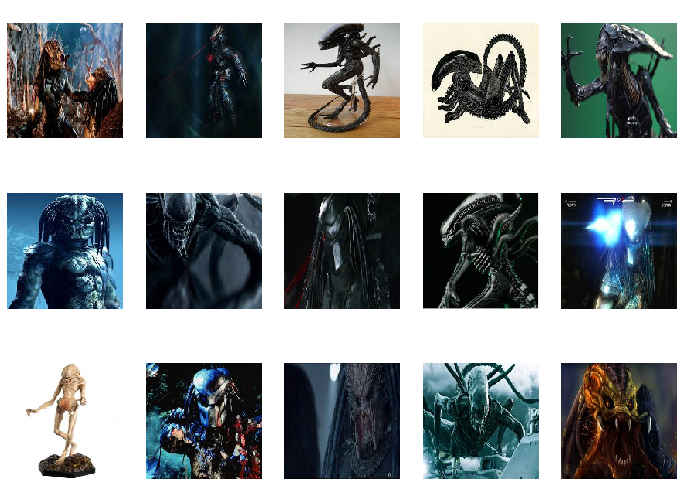

In [42]:
plot_images(training_batch, labels_batch)

#Fully connected neural netowrk

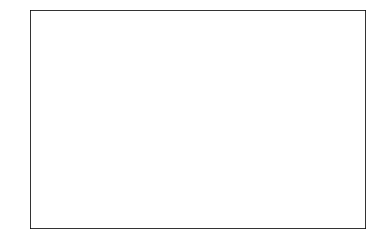

In [43]:
def plot_accuracy_and_loss(history, acc_ylim=[min(plt.ylim()),1.0], loss_ylim=[0,2.0]):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim(acc_ylim)
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim(loss_ylim)
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

def train(m, train_data=train_data_gen, epochs=epochs):
  return m.fit(
            train_data,
            steps_per_epoch=total_train // batch_size,
            epochs=epochs,
            validation_data=val_data_gen,
            validation_steps=total_val // batch_size
          )

In [0]:
model = Sequential([
  Flatten(input_shape=IMAGE_SIZE+(3,)),
  Dense(1024, activation='tanh'),
  Dense(512, activation='tanh'),
  Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 67500)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              69121024  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 69,646,337
Trainable params: 69,646,337
Non-trainable params: 0
_________________________________________________________________


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 5 steps, validate for 1 steps
Epoch 1/15
5/5 [==============================] - 5s 917ms/step - loss: 3.0878 - accuracy: 0.4965 - val_loss: 1.8208 - val_accuracy: 0.4922
Epoch 2/15
5/5 [==============================] - 3s 634ms/step - loss: 1.0341 - accuracy: 0.5124 - val_loss: 0.8620 - val_accuracy: 0.5078
Epoch 3/15
5/5 [==============================] - 3s 631ms/step - loss: 0.7586 - accuracy: 0.5124 - val_loss: 0.7011 - val_accuracy: 0.4922
Epoch 4/15
5/5 [==============================] - 3s 657ms/step - loss: 0.7140 - accuracy: 0.4984 - val_loss: 0.7124 - val_accuracy: 0.4922
Epoch 5/15
5/5 [==============================] - 3s 626ms/step - loss: 0.6971 - accuracy: 0.5106 - val_loss: 0.6922 - val_accuracy: 0.5156
Epoch 6/15
5/5 [==============================] - 3s 637ms/step - loss: 0.6965 - accuracy: 0.5071 - val_loss: 0.6967 - val_accuracy: 0.5078
Epoch 7/15
5/5 [==============================] - 3s 638ms/step - loss

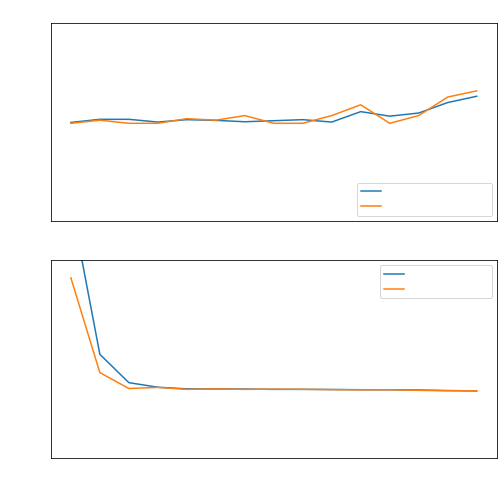

In [47]:
history = train(model)
plot_accuracy_and_loss(history)

#ConvNet

##Convolution

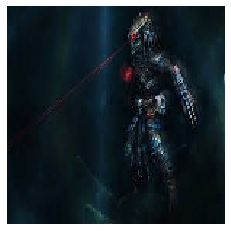

In [48]:
img = training_batch[1]
plt.axis('off')
plt.imshow(img)


In [0]:
def plot_filters(layer):
    filters = layer.shape[3]

    columns = 8
    #rows = ((filters-1) // columns) + 1
    plt.figure(figsize=(20,20))    
    for i in range(filters):
      plt.subplot(columns, columns, i+1)
      plt.title('Filter ' + str(i), color='white')
      plt.axis('off')
      plt.imshow(layer[0,:,:,i], interpolation="nearest", cmap="gray")

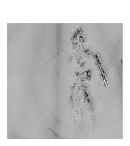

In [50]:
conv = Conv2D(1, 3, padding='same', input_shape=IMAGE_SIZE+(3,))
out = conv(tf.expand_dims(img, 0))
plot_filters(out.numpy())

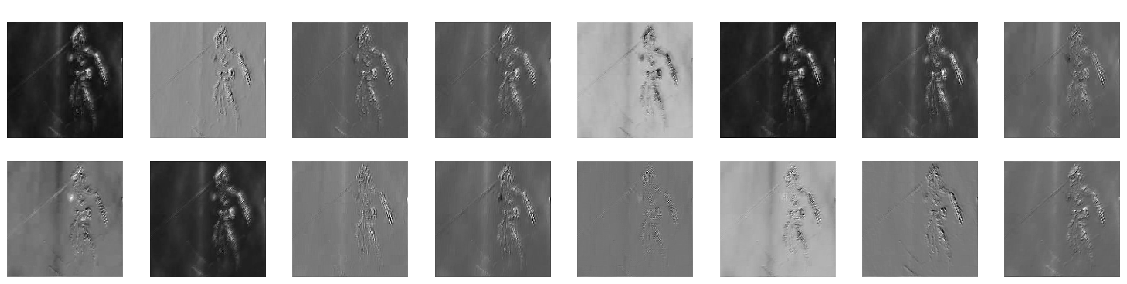

In [51]:
conv = Conv2D(16, 3, padding='same', input_shape=IMAGE_SIZE+(3,))
out = conv(tf.expand_dims(img, 0))
plot_filters(out.numpy())

##ConvModel

In [0]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=IMAGE_SIZE+(3,)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [53]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)            

In [0]:
def plot_model_filters(layers, img):
  input = tf.expand_dims(img, 0)
  for filter_layer in layers:
    output = filter_layer(input)    
    input = output
    print(filter_layer)
    plot_filters(output.numpy())
  return


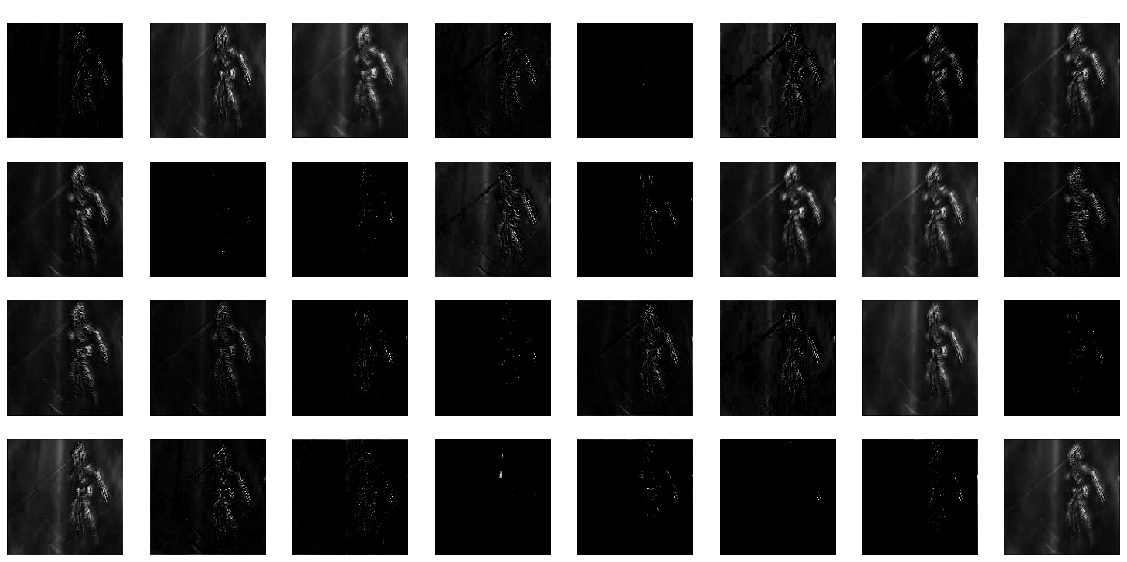

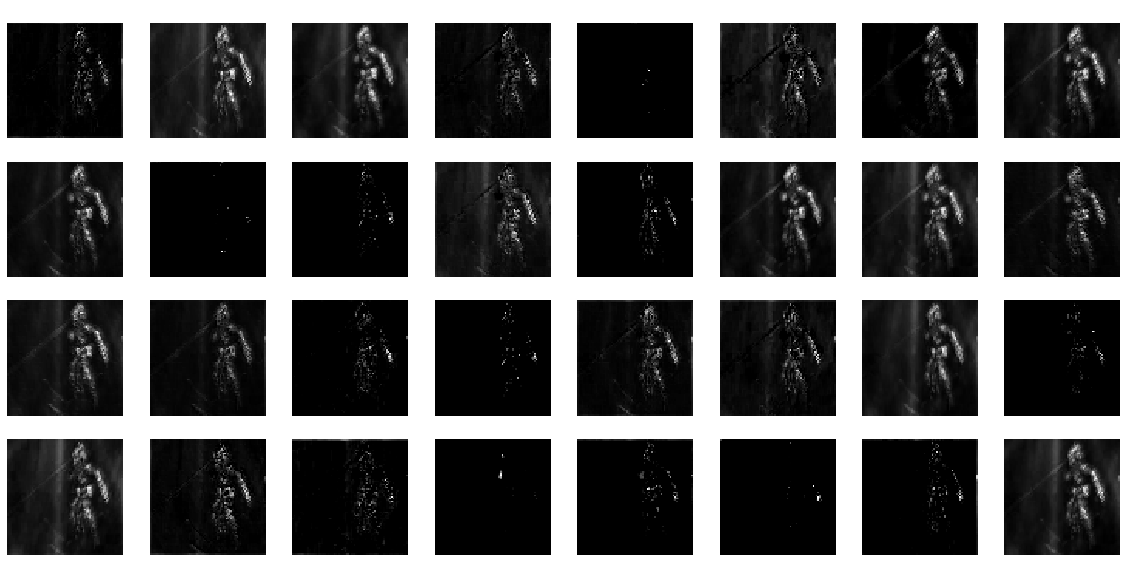

In [55]:
plot_model_filters(model.layers[:2], img)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 5 steps, validate for 1 steps
Epoch 1/15
5/5 [==============================] - 20s 4s/step - loss: 1.2417 - accuracy: 0.5125 - val_loss: 0.6925 - val_accuracy: 0.4844
Epoch 2/15
5/5 [==============================] - 16s 3s/step - loss: 0.6870 - accuracy: 0.5300 - val_loss: 0.6792 - val_accuracy: 0.5469
Epoch 3/15
5/5 [==============================] - 16s 3s/step - loss: 0.6708 - accuracy: 0.6166 - val_loss: 0.6565 - val_accuracy: 0.5469
Epoch 4/15
5/5 [==============================] - 16s 3s/step - loss: 0.6256 - accuracy: 0.6502 - val_loss: 0.5838 - val_accuracy: 0.6406
Epoch 5/15
5/5 [==============================] - 18s 4s/step - loss: 0.5672 - accuracy: 0.7250 - val_loss: 0.5559 - val_accuracy: 0.6953
Epoch 6/15
5/5 [==============================] - 16s 3s/step - loss: 0.5134 - accuracy: 0.7845 - val_loss: 0.5350 - val_accuracy: 0.7109
Epoch 7/15
5/5 [==============================] - 16s 3s/step - loss: 0.4677 - acc

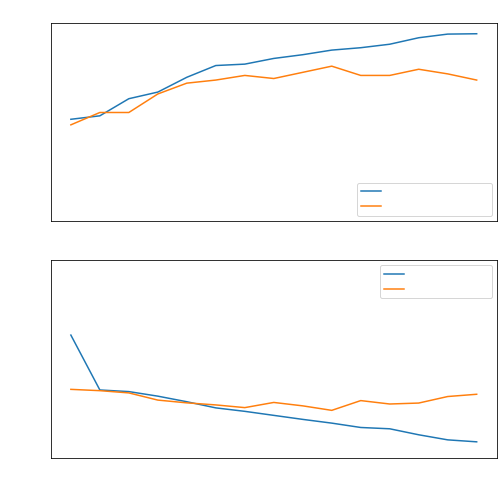

In [56]:
history = train(model)
plot_accuracy_and_loss(history)

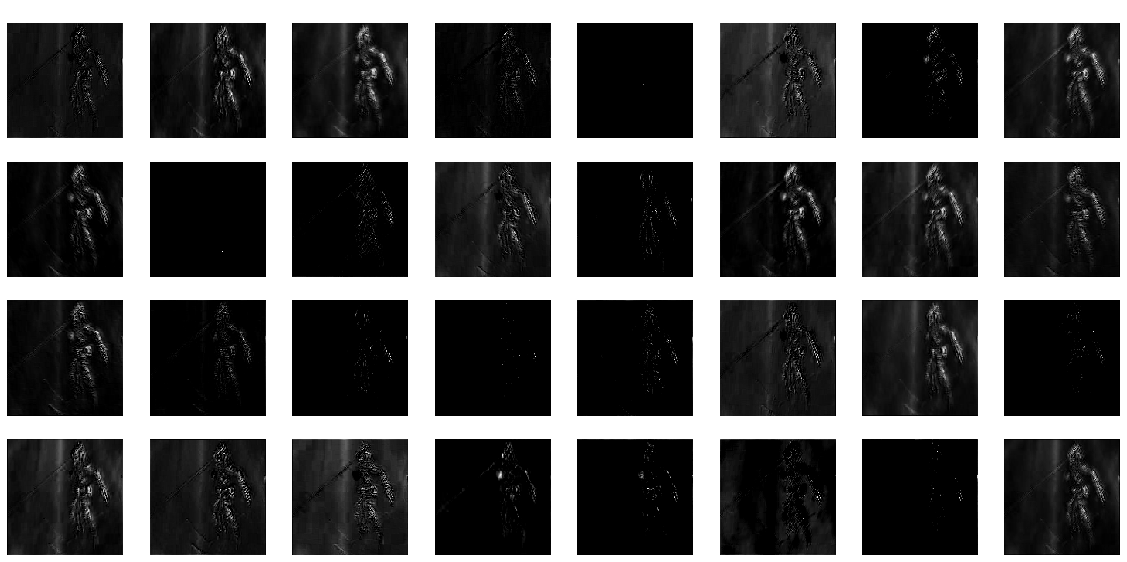

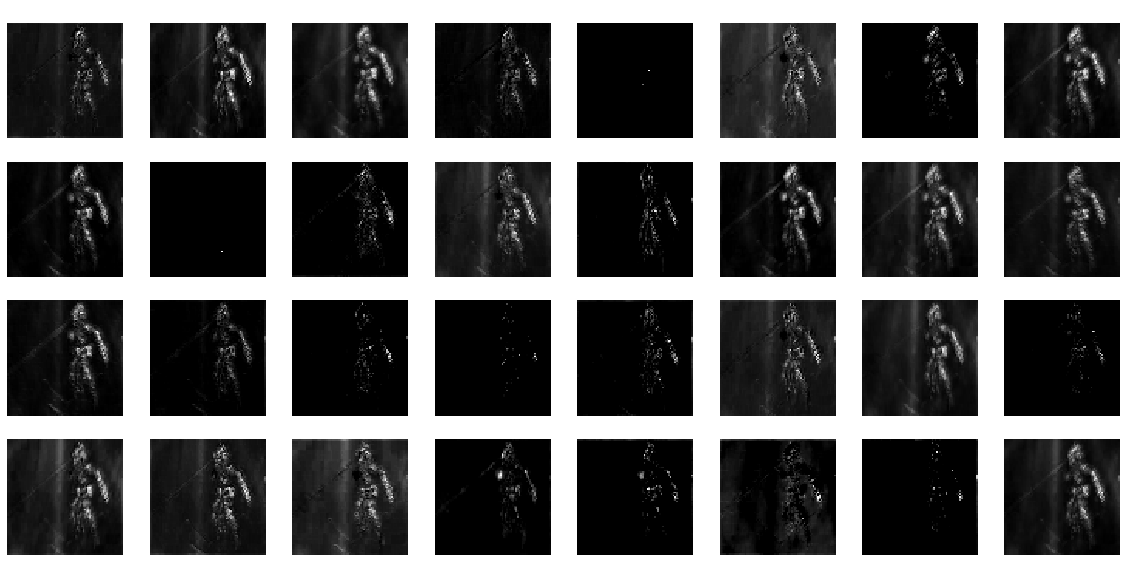

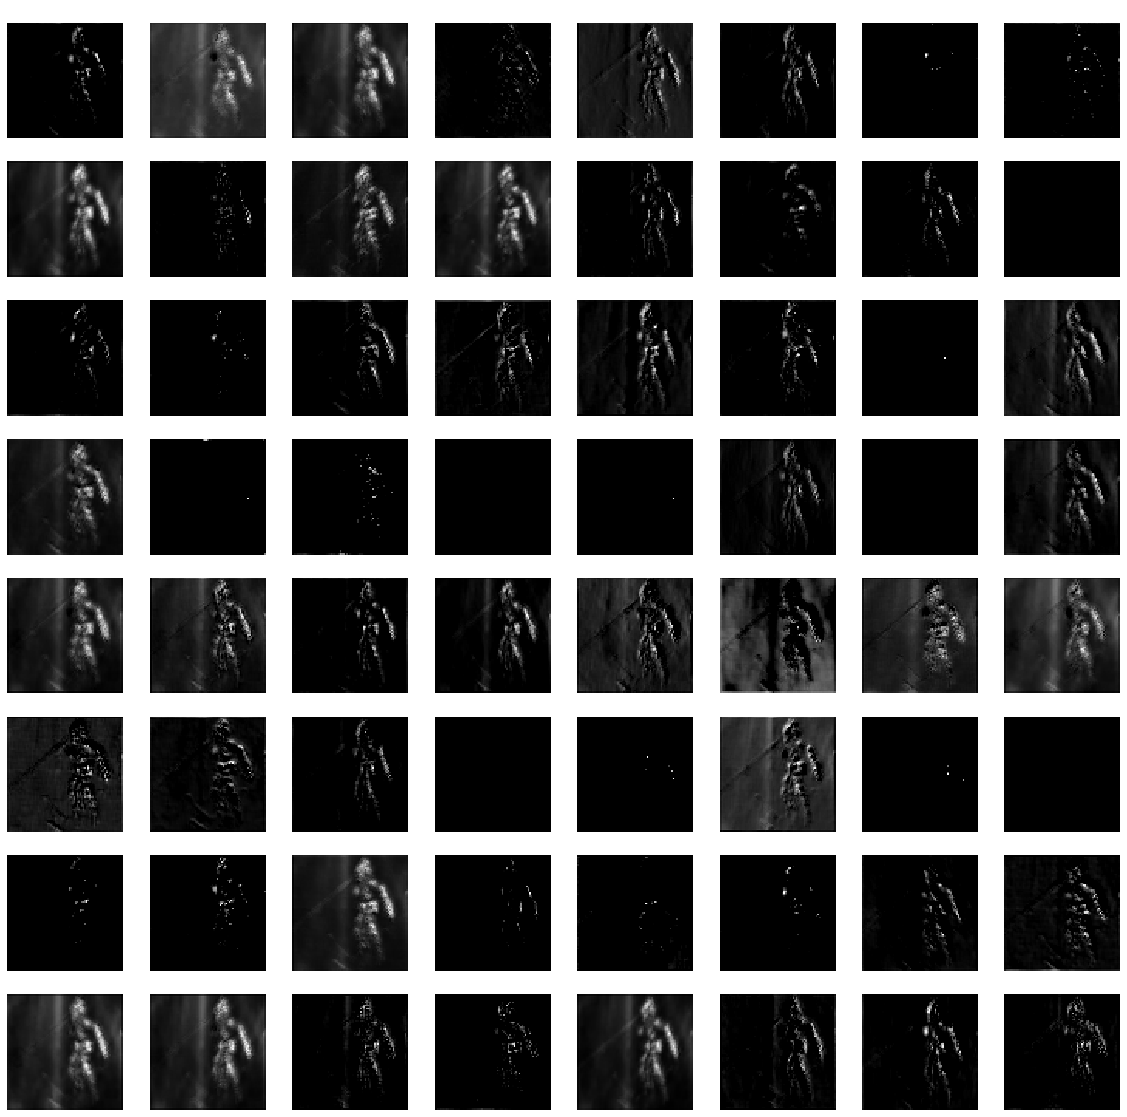

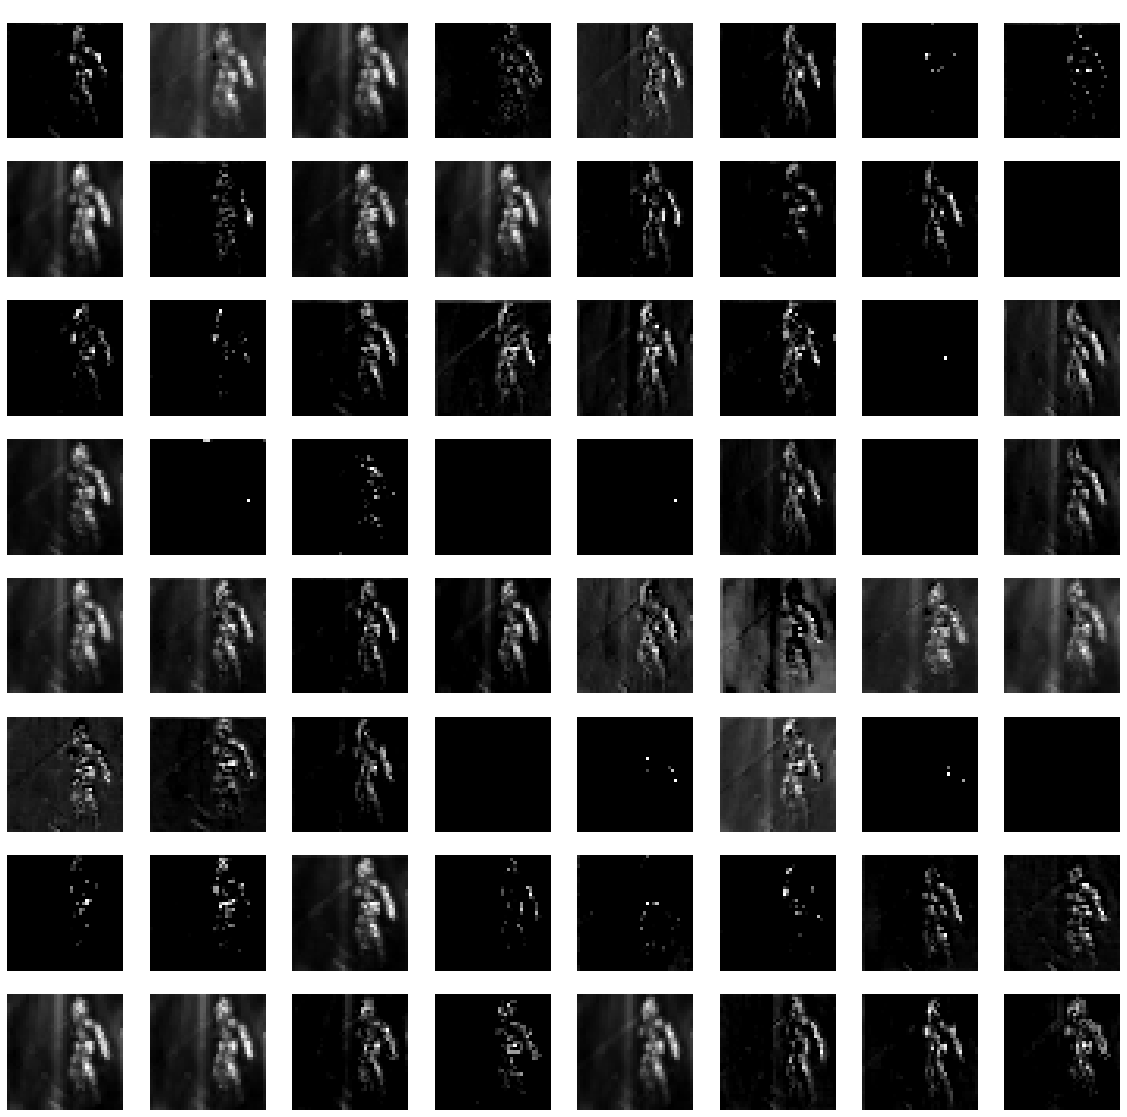

In [57]:
plot_model_filters(model.layers[:4], img)

#Overfitting

##Dropout

In [0]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=IMAGE_SIZE+(3,)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [59]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)            

In [60]:
history = train(model, train_data_gen)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 5 steps, validate for 1 steps
Epoch 1/15
5/5 [==============================] - 17s 3s/step - loss: 0.9125 - accuracy: 0.5018 - val_loss: 0.6904 - val_accuracy: 0.5078
Epoch 2/15
5/5 [==============================] - 16s 3s/step - loss: 0.6893 - accuracy: 0.5406 - val_loss: 0.6830 - val_accuracy: 0.5234
Epoch 3/15
5/5 [==============================] - 16s 3s/step - loss: 0.6761 - accuracy: 0.5813 - val_loss: 0.6367 - val_accuracy: 0.6875
Epoch 4/15
5/5 [==============================] - 18s 4s/step - loss: 0.6311 - accuracy: 0.6313 - val_loss: 0.6185 - val_accuracy: 0.6328
Epoch 5/15
5/5 [==============================] - 16s 3s/step - loss: 0.6047 - accuracy: 0.6502 - val_loss: 0.5729 - val_accuracy: 0.6641
Epoch 6/15
5/5 [==============================] - 16s 3s/step - loss: 0.5499 - accuracy: 0.7385 - val_loss: 0.5357 - val_accuracy: 0.7031
Epoch 7/15
5/5 [==============================] - 16s 3s/step - loss: 0.4901 - acc

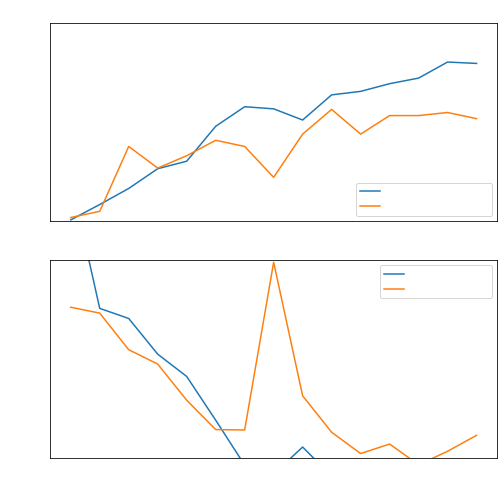

In [61]:
plot_accuracy_and_loss(history, acc_ylim=[0.5,1.0],loss_ylim=[0.5,0.75])

##Data augmentation

Found 694 images belonging to 2 classes.


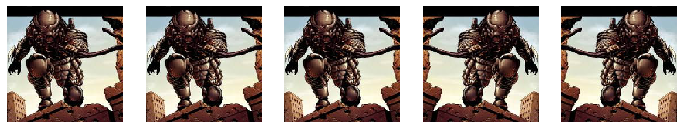

In [62]:
augmented_image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
augmented_train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')
plot_images([augmented_train_data_gen[0][0][0] for i in range(5)])

Found 694 images belonging to 2 classes.


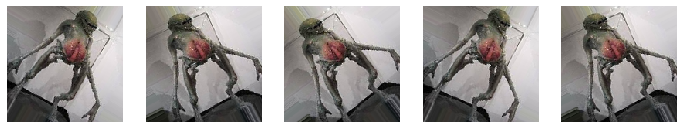

In [63]:
augmented_image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
augmented_train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')
plot_images([augmented_train_data_gen[0][0][0] for i in range(5)])

Found 694 images belonging to 2 classes.


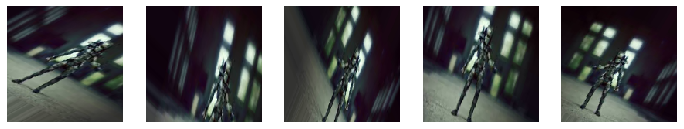

In [64]:
augmented_image_gen = ImageDataGenerator(
                                rescale=1./255,
                                rotation_range=45,
                                width_shift_range=.15,
                                height_shift_range=.15,
                                horizontal_flip=True,
                                zoom_range=0.5
                                )

augmented_train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')
plot_images([augmented_train_data_gen[0][0][0] for i in range(5)])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)            

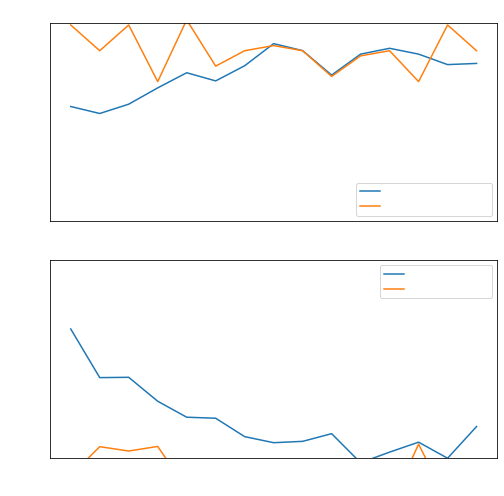

In [65]:
model.summary()
history = train(model, augmented_train_data_gen)
plot_accuracy_and_loss(history, acc_ylim=[0.5,0.8],loss_ylim=[0.5,0.75])